In [21]:
import symforce
import symforce.symbolic as sf
symforce.set_epsilon_to_symbol()

AlreadyUsedEpsilon: Cannot set return value of epsilon to epsilon after it has already been accessed with value 0.0.

In [22]:
import numpy as np
from symforce.values import Values

In [23]:
num_poses = 3

In [24]:
num_landmarks = 3

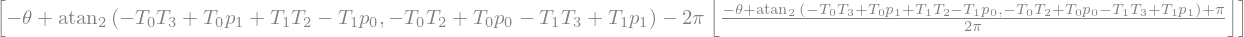

In [25]:
initial_values = Values(
    poses = [sf.Pose2.identity()]*num_poses, 
    landmarks = [sf.V2(-2,2), sf.V2(1,-3), sf.V2(5,2)],
    distances = [1.7, 1.4],
    angles = np.deg2rad([[145,335,55], [185,310,70],[215,310,70]]).tolist(),
    epsilon = sf.numeric_epsilon,
)
def bearing_residual(pose: sf.Pose2, landmark: sf.V2, angle: sf.Scalar) -> sf.V1:
    t_body = pose.inverse()*landmark
    predicted_angle = sf.atan2(t_body[1], t_body[0])
    return sf.V1(sf.wrap_angle(predicted_angle - angle))

from symforce.notebook_util import display
display(bearing_residual(sf.Pose2.symbolic("T"), sf.V2.symbolic("p"), sf.Symbol("theta")))

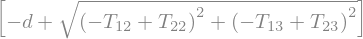

In [26]:
def odometry_residual(pose_a: sf.Pose2, pose_b: sf.Pose2, dist: sf.Scalar, epsilon: sf.Scalar = 0) -> sf.V1:
    return sf.V1((pose_b.t - pose_a.t).norm(epsilon=epsilon) - dist)

display(odometry_residual(sf.Pose2.symbolic("T1"), sf.Pose2.symbolic("T2"), sf.Symbol("d")), 0)

In [27]:
from symforce.opt.factor import Factor
factors = []
for i in range(num_poses):
    for j in range(num_landmarks):
        factors.append(Factor(
            residual=bearing_residual,
            keys=[f"poses[{i}]",f"poses[{i+1}]", f"distances[{i}]", "epsilon"],
        ))
for i in range(num_poses - 1):
    factors.append(Factor(
        residual=odometry_residual,
        keys=[f"poses[{i}]", f"poses[{i + 1}]", f"distances[{i}]", "epsilon"],
    ))



codegen.__init__():141 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html



ValueError: There must be a key for each input to the residual. Expected 3 keys but got 4 keys.

In [28]:
codegen = symforce.codegen.Codegen.function(func=bearing_residual, config=symforce.codegen.CppConfig())
codegen_linearization = codegen.with_linearization(which_args=["pose"])

codegen.__init__():141 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html

codegen.__init__():141 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code

In [32]:
metadata = codegen_linearization.generate_function()
print(open(metadata.generated_files[0]).read())
len(metadata.generated_files)
codegen = symforce.codegen.Codegen.function(func=bearing_residual, config=symforce.codegen.CppConfig())
type(codegen.outputs)

codegen.__init__():141 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html



// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/pose2.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: bearing_residual
 *
 * Args:
 *     pose: Pose2
 *     landmark: Matrix21
 *     angle: Scalar
 *
 * Outputs:
 *     res: Matrix11
 *     jacobian: (1x3) jacobian of res wrt arg pose (3)
 *     hessian: (3x3) Gauss-Newton hessian for arg pose (3)
 *     rhs: (3x1) Gauss-Newton rhs for arg pose (3)
 */
template <typename Scalar>
void BearingFactor(const sym::Pose2<Scalar>& pose, const Eigen::Matrix<Scalar, 2, 1>& landmark,
                   const Scalar angle, Eigen::Matrix<Scalar, 1, 1>* const res = nullptr,
             

symforce.values.values.Values

In [33]:
help(symforce.codegen.Codegen.with_linearization)


Help on function with_linearization in module symforce.codegen.codegen:

with_linearization(self, which_args: 'T.Sequence[str]' = None, include_result: 'bool' = True, name: 'str' = None, linearization_mode: 'LinearizationMode' = <LinearizationMode.FULL_LINEARIZATION: 'full_linearization'>, sparse_linearization: 'bool' = False, custom_jacobian: 'sf.Matrix' = None) -> 'Codegen'
    Given a codegen object that takes some number of inputs and computes a single result,
    create a new codegen object that additionally computes the jacobian (or the full
    Gauss-Newton linearization) with respect to the given input arguments.
    
    The jacobians are in the tangent spaces of the inputs and outputs, see
    :mod:`jacobian_helpers.py <symforce.jacobian_helpers>` for more information.
    
    The previous codegen object (the ``self`` argument to this function) is unmodified by this
    function and still valid after this function returns.
    
    Args:
        self: Existing codegen object

In [34]:
help(symforce.codegen.Codegen.with_jacobians)


Help on function with_jacobians in module symforce.codegen.codegen:

with_jacobians(self, which_args: 'T.Sequence[str]' = None, which_results: 'T.Sequence[int]' = (0,), include_results: 'bool' = True, name: 'str' = None, sparse_jacobians: 'bool' = False) -> 'Codegen'
    Given a codegen object that takes some number of inputs and computes some number of results,
    create a new codegen object that additionally computes jacobians of the given results with
    respect to the given input arguments. By default, computes the jacobians of the first result
    with respect to all arguments.  Flexible to produce the values and all jacobians, just the
    jacobians, or any combination of one or more jacobians.
    
    The jacobians are in the tangent spaces of the inputs and outputs, see jacobian_helpers.py
    for more information.
    
    The previous codegen object (the `self` argument to this function) is unmodified by this
    function and still valid after this function returns.
    
 

In [52]:
codegen = symforce.codegen.Codegen.function(func=bearing_residual, config=symforce.codegen.CppConfig(use_eigen_types=True))
data  = codegen.generate_function()
print(open(data.generated_files[0]).read())



codegen.__init__():141 WARNING -- 
    Generating code with epsilon set to 0 - This is dangerous!  You may get NaNs, Infs,
    or numerically unstable results from calling generated functions near singularities.

    In order to safely generate code, you should set epsilon to either a symbol
    (recommended) or a small numerical value like `sf.numeric_epsilon`.  You should do
    this before importing any other code from symforce, e.g. with

        import symforce
        symforce.set_epsilon_to_symbol()

    or

        import symforce
        symforce.set_epsilon_to_number()

    For more information on use of epsilon to prevent singularities, take a look at the
    Epsilon Tutorial: https://symforce.org/tutorials/epsilon_tutorial.html



// -----------------------------------------------------------------------------
// This file was autogenerated by symforce from template:
//     function/FUNCTION.h.jinja
// Do NOT modify by hand.
// -----------------------------------------------------------------------------

#pragma once

#include <Eigen/Dense>

#include <sym/pose2.h>

namespace sym {

/**
 * This function was autogenerated from a symbolic function. Do not modify by hand.
 *
 * Symbolic function: bearing_residual
 *
 * Args:
 *     pose: Pose2
 *     landmark: Matrix21
 *     angle: Scalar
 *
 * Outputs:
 *     res: Matrix11
 */
template <typename Scalar>
Eigen::Matrix<Scalar, 1, 1> BearingResidual(const sym::Pose2<Scalar>& pose,
                                            const Eigen::Matrix<Scalar, 2, 1>& landmark,
                                            const Scalar angle) {
  // Total ops: 23

  // Input arrays
  const Eigen::Matrix<Scalar, 4, 1>& _pose = pose.Data();

  // Intermediate terms (1)
  const Sc

In [45]:
paths = codegen.generate_function()

In [46]:
len(paths.generated_files)

In [47]:
paths1 = codegen_linearization.generate_function()

[PosixPath('/tmp/sf_codegen_bearing_factor_0d26j9i7/cpp/symforce/sym/bearing_factor.h')]

In [49]:
paths1.cpp_types_dir

PosixPath('/tmp/sf_codegen_bearing_factor_0d26j9i7/cpp/lcmtypes')

In [50]:
paths1.lcm_type_dir


PosixPath('/tmp/sf_codegen_bearing_factor_0d26j9i7/lcmtypes')

In [51]:
import os

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/sf_codegen_bearing_factor_jt5jl2qw/cpp/lcmtypes'